In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from itertools import zip_longest

In [7]:
import mat73

In [8]:
meas = mat73.loadmat('Results/MachineShop/Tx2_2G_Boiler_Vpol_Cloudat6_run1_pp.mat')

In [9]:
meta = meas['Strct_Metadata']

In [10]:
meta['SampleRate_MHz_num']*1e-6

0.00019999999999999998

In [46]:
def get_peaks(cir, sample_period):
    """
    Returns the peaks and their time delays
    """
    # Normalize the CIR
    cir = cir/((np.abs(cir))).max()
    # Calculate the peak value; peak threshold at 15dB from peak
    cir_mag = abs(cir)**2
    pkt = np.max(cir_mag)/31.6
    
    from scipy.signal import find_peaks
    peaks, _ = find_peaks(cir_mag, height=pkt)
    
    return cir[peaks], peaks*sample_period

In [12]:
sample_period = 1/meta['SampleRate_MHz_num']*1e-6

In [13]:
IQ_data = meas['IQdata']

IQ_data.shape

In [47]:
peaks = get_peaks(IQ_data[:,0], sample_period)

In [31]:
delays = np.arange(0,100)*sample_period

In [18]:
cir = IQ_data[:,0]

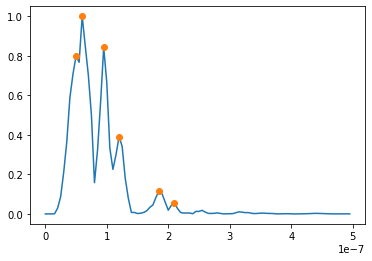

In [48]:
plt.plot(delays, (abs(cir)**2)[:100])
plt.plot(peaks[1], abs(peaks[0])**2, 'o')

ValueError: x and y must have same first dimension, but have shapes (7,) and (100,)

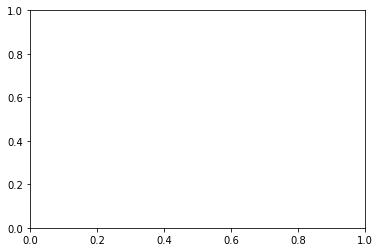

In [99]:
cir_sample = 1
peaks = get_peaks(IQ_data[:,cir_sample], sample_period)
cir = IQ_data[:,cir_sample]
plt.plot(delays, (abs(cir)**2)[:100])
plt.plot(peaks[1], abs(peaks[0])**2, 'o')

Calculate path coefficients and delays for all CIR samples.
Determine the path distribution

Mean number of paths =  8.06938775510204


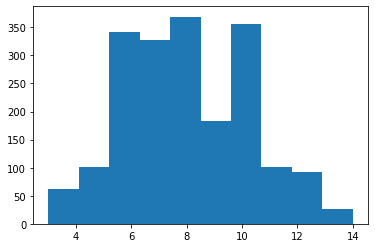

In [57]:
paths = []
for cir_idx in range(IQ_data.shape[1]):
    cir = IQ_data[:,cir_idx]
    peaks = get_peaks(cir, sample_period)
    paths.append(peaks)
print('Mean number of paths = ', np.mean([len(x[0]) for x in paths]))
_=plt.hist([len(x[0]) for x in paths])

Issues with dataset-based channel in Sionna
* there is an expectation that the channel is constant over the number of time steps considered (the OFDM resource grid)

Solution
* we assume that the channel doesn't change over the time steps considered for the OFDM resource grid
* as such every call to the generator will return the same path coefficients and delays for the entire time steps

Potential disadvantages
* missing out on ICI and ISI effects?

In [78]:
pickle.dump(paths, open('Tx2_2G_Boiler_Vpol_Cloudat6_run1_pp__paths.pickle', 'wb'))

In [55]:
np.mean([len(x[0]) for x in paths])

8.06938775510204

In [68]:
pickle.dump(IQ_data[:100,:], open('cir_iq_data.pickle', 'wb'))

In [94]:
paths[0][0]

array([ 0.73738597+0.50463945j,  0.97839543-0.2067423j ,
        0.13351481+0.90802982j, -0.56113738-0.27661216j,
       -0.13598273+0.31337503j, -0.01485261-0.23400824j])

In [93]:
np.transpose(paths[0][0])

array([ 0.73738597+0.50463945j,  0.97839543-0.2067423j ,
        0.13351481+0.90802982j, -0.56113738-0.27661216j,
       -0.13598273+0.31337503j, -0.01485261-0.23400824j])

In [98]:
np.transpose(np.tile(paths[0][0], (10,1)))

array([5.00e-08, 6.00e-08, 9.50e-08, 1.20e-07, 1.85e-07, 2.10e-07])

In [56]:
def to_chunks(iterable, chunk_size):
    """Split the iterable into equal-sized chunks"""
    args = [iter(iterable)]*chunk_size
    return zip(*args)

In [57]:
l = list(range(40))

In [84]:
cir

array([ 0.73738597+0.50463945j,  0.97839543-0.2067423j ,
        0.13351481+0.90802982j, -0.56113738-0.27661216j,
       -0.13598273+0.31337503j, -0.01485261-0.23400824j,
        0.73738597+0.50463945j,  0.97839543-0.2067423j ,
        0.13351481+0.90802982j, -0.56113738-0.27661216j,
       -0.13598273+0.31337503j, -0.01485261-0.23400824j,
        0.73738597+0.50463945j,  0.97839543-0.2067423j ,
        0.13351481+0.90802982j, -0.56113738-0.27661216j,
       -0.13598273+0.31337503j, -0.01485261-0.23400824j,
        0.73738597+0.50463945j,  0.97839543-0.2067423j ,
        0.13351481+0.90802982j, -0.56113738-0.27661216j,
       -0.13598273+0.31337503j, -0.01485261-0.23400824j,
        0.73738597+0.50463945j,  0.97839543-0.2067423j ,
        0.13351481+0.90802982j, -0.56113738-0.27661216j,
       -0.13598273+0.31337503j, -0.01485261-0.23400824j,
        0.73738597+0.50463945j,  0.97839543-0.2067423j ,
        0.13351481+0.90802982j, -0.56113738-0.27661216j,
       -0.13598273+0.31337503j,

In [92]:
cir[1]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [48]:
cirs = IQ_data[:,:4]

In [62]:
cirs.shape

(8188, 4)

In [63]:
data = np.ndarray((1,1,1,1,1,*cirs.shape))

In [65]:
data[0][0][0][0][0] = cirs

/tmp/ipykernel_126302/3205174647.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  data[0][0][0][0][0] = cirs
